# Homework 3, problem 4.C1
* Zein Sadek
* ENGR 213
* Due 7/16/19

Two aluminum strips and a steel strip are to be bonded together to
form a composite member of width b=60 mm and depth h=40 mm.
The modulus of elasticity is 200 GPa for the steel and 75 GPa for the aluminum.
Knowing that M=1500 N m, write a computer program to calculate
the maximum stress in the aluminum and in the steel for values of
a from 0 to 20 mm using 2 mm increments. Using appropriate smaller
increments, determine (a) the largest stress that can occur in the steel and
(b) the corresponding value of a.

### Since we are given a fair amount of information, we can begin by declaring our given variables

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
b=60                  # 60 mm 
h=40                  # 40 mm
e_st=200*(10**3)      # 200 GPa = 200x10^3 MPa
e_al=75*(10**3)       # 75 GPa = 75x10^3 MPa
M=1500*10**3          # 1500 N*m = 1500*10^3 N*mm
a=np.arange(0,22,2)   

We will also have to solve the relative stiffness to be able to find the moments of inertia 

In [3]:
n_st=e_st/e_al
n_al=1

### Moment of Inertia

When we transform the composite structure to that comprised only of aluminum, the steel portion must gain a larger area since it is being represented by a weaker material. This gives us the same general shape of our structure but with two flanges sticking out of where the steel would have been. This gives us a moment of inertia of, 

In [4]:
I=((1/12)*b*h**3)+((1/12)*(n_st*b-b)*((h-2*a)**3))

### Stress

To evaluate the stress in the aluminum or steel we can use our equation ```stress = n*(M*c)/I``` where ```M``` and ```I``` will stay the same and ```c``` will vary between the aluminum and steel.

The value ```c``` represents the distance from the centroid at which the stress in being evaluated. Since we are looking for maximum stress, our ```c``` values will be the largest distance from the centroid for each respective material. This gives us,

In [5]:
c_al=h/2
c_st=(h/2)-a

Our stress equations are then,

In [6]:
stress_al=(n_al*M*c_al)/I
stress_st=(n_st*M*c_st)/I

### Visualization

While we can easy process our matrices for stress, but I believe plotting our values will make what is happening while ```a``` increases clearer

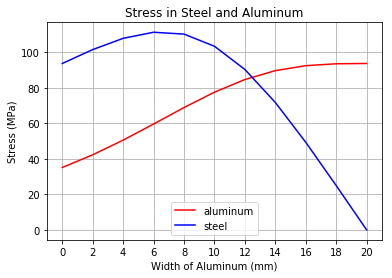

In [7]:
plt.plot(a, stress_al, label='aluminum',color='r')
plt.plot(a, stress_st, label='steel',color='b')
plt.title('Stress in Steel and Aluminum')
plt.ylabel('Stress (MPa)')
plt.xlabel('Width of Aluminum (mm)')
plt.xticks(a)
plt.grid(True)
plt.legend(loc=8)
plt.show()

We can see that as ```a``` increases the stress in aluminum generally increases while the stress in steel will generally decrease. We can also see that the maximum stress in steel occurs somewhere between ```a=6``` and ```a=8```. We can plot our graph again with a smaller interval for ```a``` to see a smoother curve while also focusing on the region of interest

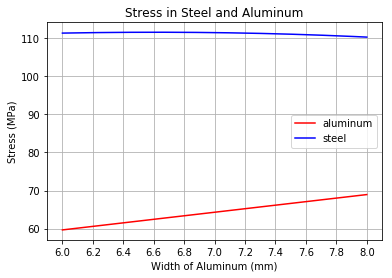

In [8]:
z=np.arange(6,8.001,0.01)
z_1=np.arange(6,8.2,0.2)

I_z=((1/12)*b*h**3)+((1/12)*(n_st*b-b)*((h-2*z)**3))
c_st_z=(h/2)-z
stress_al_z=(n_al*M*c_al)/I_z
stress_st_z=(n_st*M*c_st_z)/I_z
plt.plot(z, stress_al_z, label='aluminum',color='r')
plt.plot(z, stress_st_z, label='steel',color='b')
plt.title('Stress in Steel and Aluminum')
plt.ylabel('Stress (MPa)')
plt.xlabel('Width of Aluminum (mm)')
plt.xticks(z_1)
plt.grid(True)
plt.legend(loc=5)
plt.show()

### Getting numeric values

By doing some numeric manipulation we can extract the largest stress experienced in the steel and the corresponding value of ```a``` 

In [9]:
stress_st_max=np.max(stress_st_z)
table=dict(zip(stress_st_z,z))
a_max=table[stress_st_max]
print(f'The largest stress experienced by the steel is {np.round(stress_st_max,3)} MPa when a={np.round(a_max,2)} mm')

The largest stress experienced by the steel is 111.572 MPa when a=6.61 mm
